### Thompson sampling convergence

In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta

In [2]:
#Creating a bayesian bandit object
class Bandit(object):
    
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        
    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a, self.b)
    
    def update(self, x):
        self.a += x
        self.b += 1-x

In [7]:
#creating a function to demonstarte convergence
def run_experiment(p1, p2, p3, N):
    
    bandits = [Bandit(p1), Bandit(p2), Bandit(p3)]
    
    data = np.empty(N)
    
    for i in range(N):
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)
        
        data[i] = x
        cumulative_avg_ctr = np.cumsum(data) / (np.arange(N) + 1)
    
    fig, ax = plt.subplots(figsize=(15,7))    
    plt.plot(cumulative_avg_ctr)
    plt.plot(np.ones(N)*p1)
    plt.plot(np.ones(N)*p2)
    plt.plot(np.ones(N)*p3)
    plt.ylim((0,1))
    plt.xscale('log')
    plt.title("Thompson sampling convergence")
    plt.show()

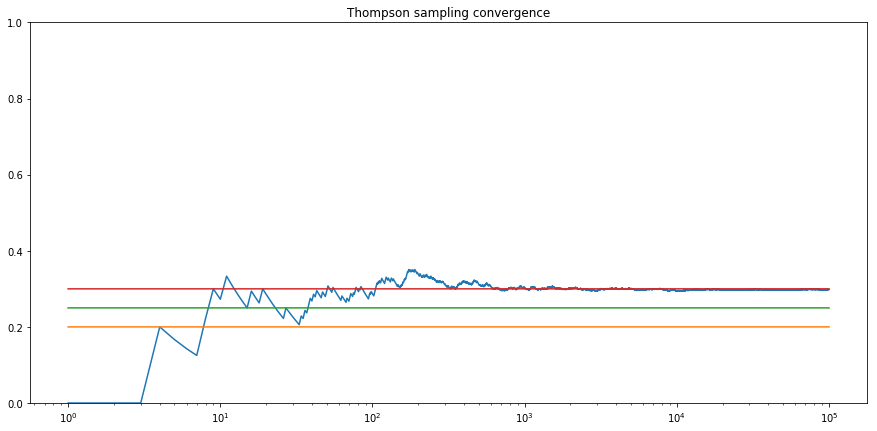

In [8]:
run_experiment(0.2,0.25,0.3, 100000)